In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [78]:
df = pd.read_csv('feeds.csv')
df.head(10)

,created_at,entry_id,field1,field2,field3,field4
0,2018-07-19 17:59:04 UTC,1,212.2,44.0,22.000,23.375
1,2018-07-19 17:59:33 UTC,2,211.9,44.0,22.062,23.375
2,2018-07-19 17:59:48 UTC,3,202.6,44.5,22.062,23.437
3,2018-07-19 18:00:03 UTC,4,210.2,44.5,22.000,23.437
4,2018-07-19 18:00:21 UTC,5,210.9,44.5,22.000,23.437
5,2018-07-19 18:00:50 UTC,6,205.5,45.1,21.937,23.500
6,2018-07-19 18:01:19 UTC,7,213.2,45.1,21.937,23.562
7,2018-07-19 18:01:34 UTC,8,211.2,45.1,21.937,23.562
8,2018-07-19 18:02:05 UTC,9,209.6,45.1,21.937,23.562
9,2018-07-19 18:02:34 UTC,10,214.3,45.1,22.000,23.562


In [79]:
df.tail()

,created_at,entry_id,field1,field2,field3,field4
237741,2018-10-09 13:33:17 UTC,237742,0.0,35.2,25.375,27.937
237742,2018-10-09 13:33:49 UTC,237743,0.0,35.8,25.375,27.937
237743,2018-10-09 13:34:15 UTC,237744,0.0,34.7,25.375,27.937
237744,2018-10-09 13:34:46 UTC,237745,0.0,35.8,25.375,27.937
237745,2018-10-09 13:35:16 UTC,237746,0.0,35.8,25.375,27.937


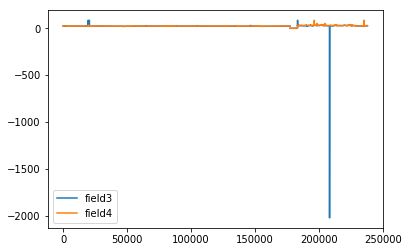

In [80]:
df[['field3','field4']].plot()

In [149]:
df = df[df['field4']> 0]
df = df[df['field3']> 0]
df = df[df['field4']< 35]
df = df[df['field3']< 35]

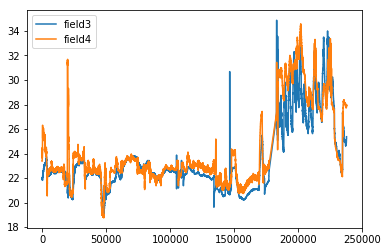

In [150]:
df[['field3','field4']].plot()

In [151]:
df['datetime'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC') for x in df['created_at']]

In [152]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df['date2'] = df['datetime'].dt.hour + df['datetime'].dt.minute/60 + df['datetime'].dt.second/3600

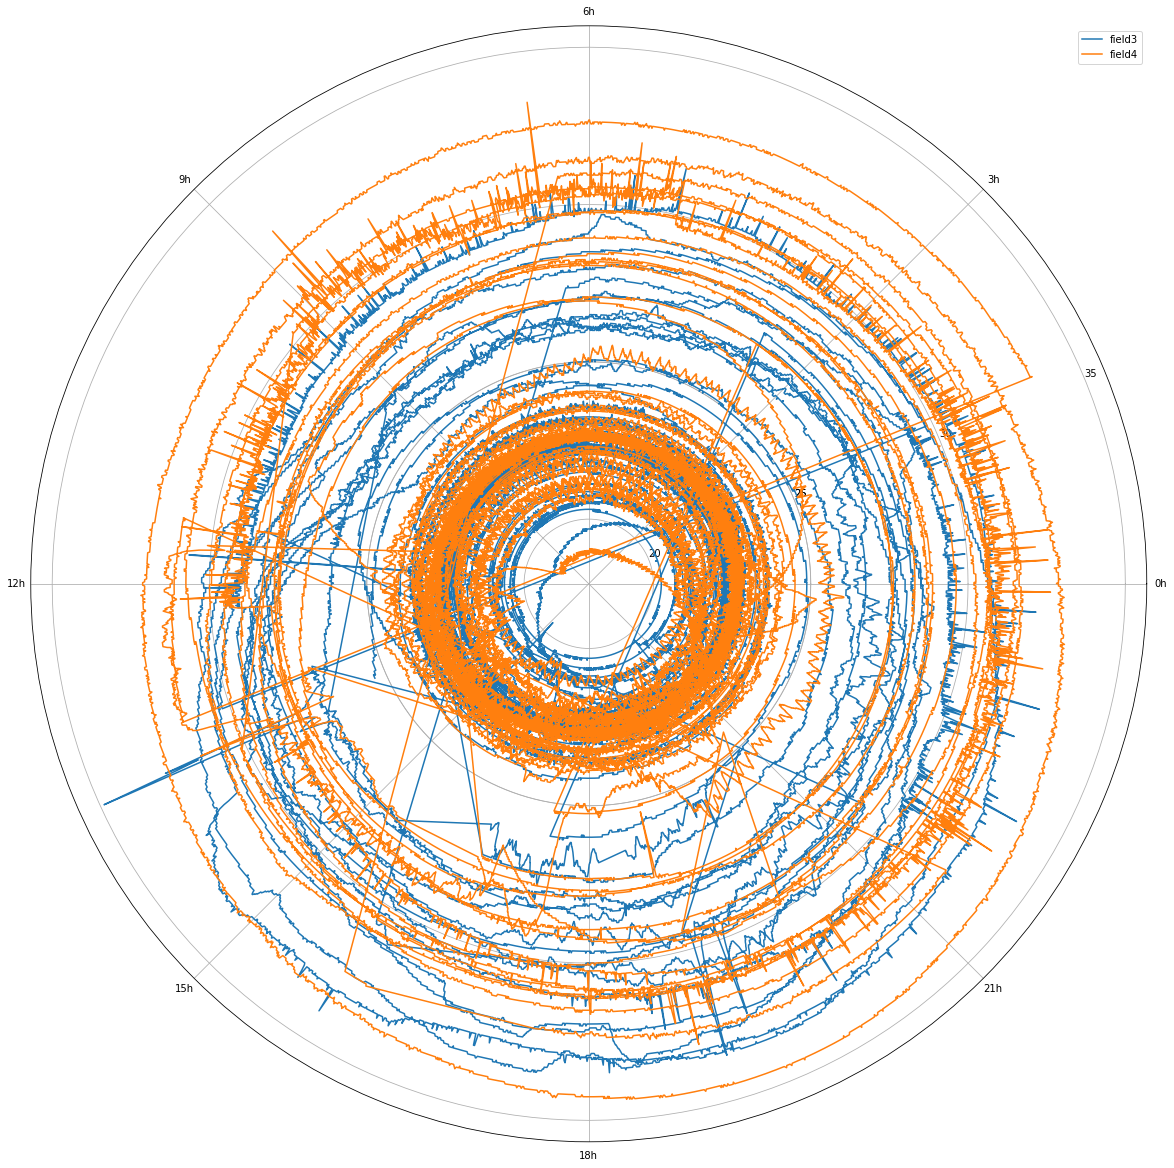

In [235]:
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(1,1,1,projection='polar')
ax.set_rticks([10,25,20,25,30,35])
ax.set_xticklabels(['0h', '3h', '6h', '9h', '12h', '15h', '18h', '21h'])

df2 = df
df2['theta'] = df2['date2']  * np.pi / 24. *2

ax.plot(df2['theta'] , df2['field3'] )
ax.plot(df2['theta'] , df2['field4'] )
ax.legend()
plt.show()

In [236]:
df2.describe()

,entry_id,field1,field2,field3,field4,date2,theta
count,231962.000000,231962.000000,231962.000000,231962.000000,231962.000000,231962.000000,231962.000000
mean,117343.769518,285.212011,43.734871,23.464387,24.160424,11.940329,3.125971
std,68782.982732,350.741264,7.338215,2.792833,3.109793,6.981820,1.827836
min,1.000000,-1.000000,25.600000,19.062000,18.750000,0.000000,0.000000
25%,57994.250000,130.900000,37.600000,21.937000,22.375000,5.847847,1.530963
50%,115984.500000,188.200000,44.500000,22.562000,22.875000,11.856667,3.104068
75%,173974.750000,336.300000,47.800000,23.625000,24.125000,18.057778,4.727515
max,237746.000000,3442.300000,93.500000,34.875000,34.562000,23.999722,6.283113


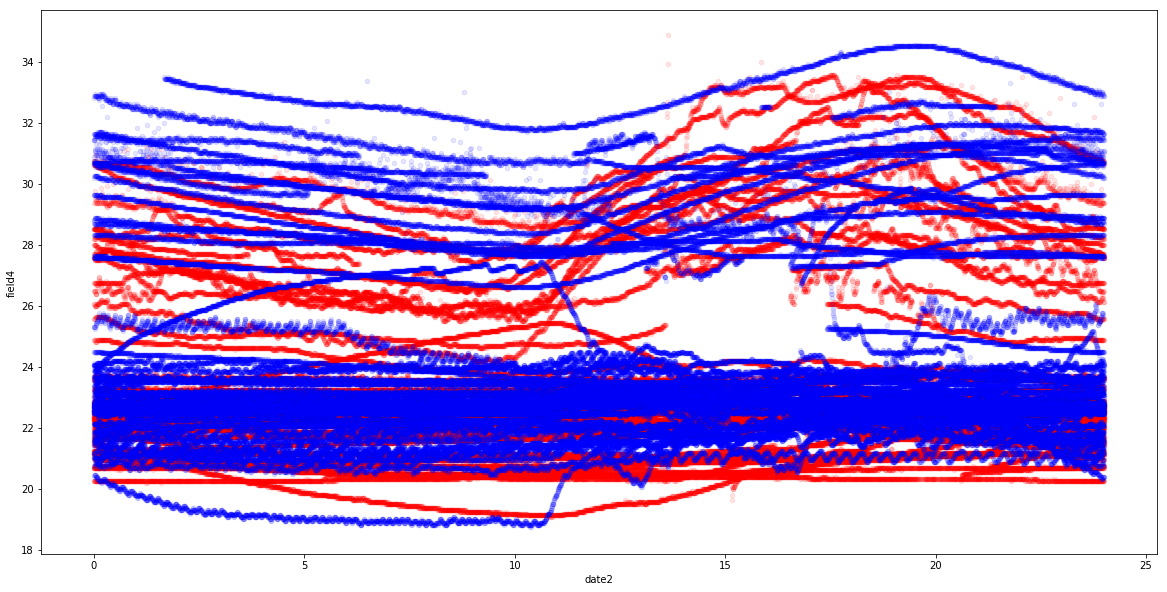

In [244]:
ax = plt.gca()

theta = df2['date2']  * np.pi / 24. *2
r3 = df2['field3']  
r4 = df2['field4'] 

df2.plot(kind='scatter',x='date2', y='field3', color='red', alpha=.1, ax = ax, figsize=(20,10))
df2.plot(kind='scatter',x='date2', y='field4', color='blue', alpha=.1, ax = ax)
